In [1]:
!git clone https://github.com/cubem10/School_Demand_Prediction.git

Cloning into 'School_Demand_Prediction'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 10 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), done.


In [2]:
!sudo apt install fonts-nanum
!sudo fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,755 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123576 files and dire

In [17]:
!rm -rf ~/.cache/matplotlib -rf ~/.cache/seaborn

# 데이터 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import os

data_path = os.path.abspath('School_Demand_Prediction/backend/data')
file_path1 = os.path.join(data_path, 'tfr_per_region.csv')
file_path2 = os.path.join(data_path, 'population.csv')
file_path3 = os.path.join(data_path, 'school_per_region.csv')

data1 = pd.read_csv(file_path1).T.reset_index()

data1.drop(0, axis=1, inplace=True)

In [3]:
data1.columns = ['기간'] + list(data1.iloc[0, 1:])
data1.drop(0, inplace=True)
data1

,기간,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
1,2016,0.940,1.095,1.186,1.144,1.168,1.192,1.418,1.821,1.194,1.237,1.358,1.395,1.251,1.466,1.396,1.358,1.432
2,2017,0.836,0.976,1.067,1.007,1.053,1.075,1.261,1.668,1.069,1.123,1.235,1.276,1.151,1.325,1.256,1.227,1.305
3,2018,0.761,0.899,0.987,1.006,0.972,0.952,1.131,1.566,1.002,1.067,1.172,1.186,1.044,1.240,1.167,1.122,1.220
4,2019,0.717,0.827,0.932,0.940,0.913,0.883,1.084,1.472,0.943,1.082,1.050,1.112,0.971,1.234,1.089,1.046,1.145
5,2020,0.642,0.747,0.807,0.829,0.811,0.805,0.984,1.277,0.878,1.036,0.983,1.029,0.909,1.145,1.003,0.945,1.021
6,2021,0.626,0.728,0.785,0.778,0.896,0.810,0.940,1.277,0.853,0.979,0.949,0.963,0.850,1.017,0.966,0.903,0.951
7,2022,0.593,0.723,0.757,0.747,0.844,0.842,0.848,1.121,0.839,0.968,0.871,0.909,0.817,0.969,0.930,0.838,0.919


In [4]:
data1 = data1.melt(id_vars='기간', var_name='행정구역(시)', value_name='합계출산율')
data1

,기간,행정구역(시),합계출산율
0,2016,서울특별시,0.940
1,2017,서울특별시,0.836
2,2018,서울특별시,0.761
3,2019,서울특별시,0.717
4,2020,서울특별시,0.642
...,...,...,...
114,2018,제주특별자치도,1.220
115,2019,제주특별자치도,1.145
116,2020,제주특별자치도,1.021
117,2021,제주특별자치도,0.951


In [5]:
data1['합계출산율'] = data1['합계출산율'].astype(float)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기간       119 non-null    object 
 1   행정구역(시)  119 non-null    object 
 2   합계출산율    119 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.9+ KB


In [6]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [7]:
import seaborn as sns

sns.set_style('darkgrid')
def lineplot(x, y, data, hue, step, xlabel, ylabel):
  sns.lineplot(x=x, y=y, data=data, hue=hue)
  plt.yticks(np.arange(np.min(data[y]), np.max(data[y]), step))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

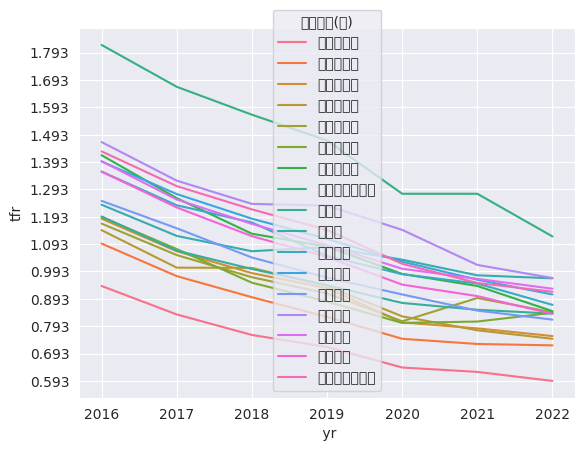

In [18]:
lineplot('기간', '합계출산율', data1, '행정구역(시)', 0.1, ' yr', 'tfr')

In [9]:
data2 = pd.read_csv(file_path2).T.reset_index()

In [10]:
data2.columns = ['기간'] + list(data2.iloc[0, 1:])
data2.drop('행정구역(시군구)별', axis=1, inplace=True)
data2 = data2.iloc[1::3]
data2

,기간,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도
1,2016.05,9995784,3510833,2485134,2933959,1472317,1516494,1173147,227972,12594829,1547821,1586414,2084034,1865634,1904449,2701912,3367730,632802
4,2017.05,9919016,3489212,2482476,2946270,1466741,1509587,1167960,259157,12775175,1547453,1592573,2105959,1858927,1899088,2692859,3372586,647547
7,2018.05,9820971,3458134,2469936,2953255,1460564,1495234,1160657,297604,12958648,1545291,1595822,2121618,1846144,1889726,2682316,3377626,662633
10,2019.05,9762062,3429595,2452291,2957179,1459003,1484398,1151685,325777,13145482,1540776,1599854,2125732,1827871,1871718,2669731,3367857,669328
13,2020.05,9724496,3406942,2429059,2950063,1455533,1471915,1143148,345373,13324041,1538639,1596710,2118510,1810097,1855945,2648760,3351347,670793
16,2021.05,9575355,3367334,2402940,2936382,1443154,1457161,1127175,362036,13488910,1535491,1596955,2117260,1794682,1842423,2633592,3327298,674877
19,2022.05,9496887,3338167,2376676,2955167,1436012,1448933,1116482,379340,13581496,1539005,1597033,2119661,1779230,1827674,2616177,3298016,677766
22,2023.05,9418885,3309261,2357032,2978089,1425739,1445221,1106446,386050,13612597,1533081,1594007,2125833,1763004,1812475,2590726,3265018,677057
25,2024.05,9371930,3282751,2367803,3009873,1414254,1441119,1100609,387774,13654710,1522952,1591201,2134618,1746912,1795717,2545421,3237140,672563


In [11]:
for col in data2.columns[1:]:
    data2[col] = data2[col].astype(int)

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 1 to 25
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기간       9 non-null      object
 1   서울특별시    9 non-null      int64 
 2   부산광역시    9 non-null      int64 
 3   대구광역시    9 non-null      int64 
 4   인천광역시    9 non-null      int64 
 5   광주광역시    9 non-null      int64 
 6   대전광역시    9 non-null      int64 
 7   울산광역시    9 non-null      int64 
 8   세종특별자치시  9 non-null      int64 
 9   경기도      9 non-null      int64 
 10  강원특별자치도  9 non-null      int64 
 11  충청북도     9 non-null      int64 
 12  충청남도     9 non-null      int64 
 13  전북특별자치도  9 non-null      int64 
 14  전라남도     9 non-null      int64 
 15  경상북도     9 non-null      int64 
 16  경상남도     9 non-null      int64 
 17  제주특별자치도  9 non-null      int64 
dtypes: int64(17), object(1)
memory usage: 1.4+ KB


In [12]:
scaled_data2 = pd.DataFrame()

for col in data2.columns[1:]:
    scaled_data2[col] = (data2[col] - np.min(data2[col])) / (np.max(data2[col]) - np.min(data2[col]))

In [13]:
scaled_data2

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도
1,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.929559,0.000000
4,0.876946,0.905205,0.979251,0.162170,0.903966,0.908365,0.928493,0.195148,0.170157,0.985202,0.458259,0.433437,0.943507,0.950695,0.942150,0.964125,0.327929
7,0.719785,0.768947,0.881360,0.254182,0.797582,0.717944,0.827814,0.435739,0.343264,0.898267,0.700000,0.743002,0.835835,0.864594,0.874779,1.000000,0.663442
10,0.625358,0.643821,0.743618,0.305872,0.770697,0.574182,0.704127,0.612039,0.519542,0.716716,1.000000,0.824332,0.681921,0.698975,0.794359,0.930463,0.812339
13,0.565142,0.544502,0.562263,0.212135,0.710935,0.408570,0.586437,0.734665,0.688013,0.630785,0.766071,0.681559,0.532210,0.553912,0.660351,0.812942,0.844920
16,0.326078,0.370845,0.358371,0.031918,0.497735,0.212829,0.366236,0.838938,0.843567,0.504202,0.784301,0.656848,0.402369,0.429552,0.563425,0.641758,0.935749
19,0.200298,0.242965,0.153347,0.279369,0.374731,0.103668,0.218823,0.947222,0.930922,0.645502,0.790104,0.704314,0.272216,0.293906,0.452141,0.433324,1.000000
22,0.075266,0.116230,0.000000,0.581316,0.197802,0.054421,0.080468,0.989212,0.960266,0.407294,0.564955,0.826328,0.135544,0.154122,0.289505,0.198440,0.984232
25,0.000000,0.000000,0.084081,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.356176,1.000000,0.000000,0.000000,0.000000,0.000000,0.884285


In [14]:
scaled_data2 = scaled_data2.melt(id_vars='기간', var_name='행정구역(시군구)별', value_name='인구수')

KeyError: '기간'

In [ ]:
lineplot('기간', '인구수', scaled_data2, '행정구역(시군구)별', 0.1, 'period', 'population')

In [ ]:
data3 = pd.read_csv(file_path3).T.reset_index()
data3.columns = ['기간', '학교급'] + list(data3.iloc[0, 2:])
data3 = data3.iloc[1:, :]
data3

In [ ]:
data3['기간'] = data3['기간'].apply(lambda x: x[:4])

for col in data3.columns[2:]:
    data3[col] = data3[col].astype(int)

data3.info()

In [ ]:
scaled_data3 = pd.DataFrame()

for col in data3.columns[2:]:
    scaled_data3[col] = (data3[col] - np.min(data3[col])) / (np.max(data3[col]) - np.min(data3[col]))

scaled_data3

In [ ]:
scaled_elementary_data3 = scaled_data3[scaled_data3['학교급'] == '초등학교'].drop('학교급', axis=1)
scaled_middle_data3 = scaled_data3[scaled_data3['학교급'] == '중학교'].drop('학교급', axis=1)
scaled_high_data3 = scaled_data3[scaled_data3['학교급'] == '고등학교'].drop('학교급', axis=1)

scaled_elementary_data3

In [ ]:
scaled_elementary_data3 = scaled_elementary_data3.melt(id_vars='기간', var_name='행정구역(시)', value_name='초등학교 수')
scaled_middle_data3 = scaled_middle_data3.melt(id_vars='기간', var_name='행정구역(시)', value_name='중학교 수')
scaled_high_data3 = scaled_high_data3.melt(id_vars='기간', var_name='행정구역(시)', value_name='고등학교 수')

scaled_elementary_data3

In [ ]:
sns.lineplot(x='기간', y='초등학교 수', data=scaled_elementary_data3, hue='행정구역(시)')
plt.yticks(np.arange(np.min(scaled_elementary_data3['초등학교 수']), np.max(scaled_elementary_data3['초등학교 수']), 0.1))
plt.legend().remove()
plt.xlabel('yr')
plt.ylabel('num. of school')
plt.ylim([0.9, 1])

plt.show()